In [1]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import betaln
from scipy.stats import beta

plt.style.use('seaborn-darkgrid')
print('Running on PyMC3 v{}'.format(pm.__version__))

Running on PyMC3 v3.5


### Compute marginal likelihood, analytically, for a beta-binomial model

In [2]:
def beta_binom(prior, y):
    alpha, beta = prior
    h = np.sum(y)
    n = len(y)
    p_y = np.exp(betaln(alpha + h, beta + n - h) -
                betaln(alpha, beta))
    return p_y

In [3]:
y = np.repeat([1, 0], [50, 50])
priors = ((1, 1), (30, 30))

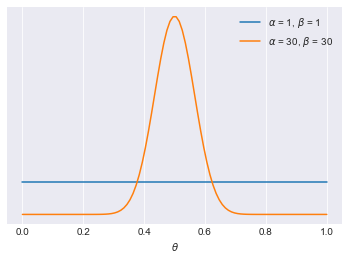

In [4]:
for a, b in priors:
    dist = beta(a, b)
    x = np.linspace(0, 1, 100)
    x_pdf = dist.pdf(x)
    
    plt.plot (x, x_pdf, label=r'$\alpha$ = {:d}, $\beta$ = {:d}'.format(a, b))
    plt.yticks([])
    plt.xlabel('$\\theta$')
    plt.legend()

In [5]:
BF = (beta_binom(priors[1], y) / beta_binom(priors[0], y))
print(round(BF))

5.0
